### Import Necessary Libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score... always scale the dataset for unsupervised/clustering learning
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans, DBSCAN

# import silhouette metrics
from sklearn.metrics import silhouette_score

In [2]:
# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

### Load Dataset

In [3]:
# Load dataset
credit_card_data = pd.read_excel('Credit+Card+Customer+Data.xlsx')

In [4]:
# make a copy of dataset
df = credit_card_data.copy()

# print the first 50 rows
df.head(50)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [5]:
# number of rows and columns
df.shape

(660, 7)

In [6]:
# Check for null values
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
# check general information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
# 
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


### Observation On Dataset Evaluation
The data shows that;
- there's an average of 2 online visits, 2 visit to the bank and 3 total calls made per customer yearly
- 50 percent and above of the customers have a total number of 5 credit cards per customer, also 2 online and bank visits and makes 3 calls to the bank yearly
- there are also customers who did not make any online or in person visits or even place a phone call across
- All customers have a credit card but the list number of credit card owned by a customer is one
- the most number of credit cards, calls made, bank visits, online visits, were 10 cards, 10 calls, 5 bank visits, 15 online visits per customer.
- the lowest and highest credit card limit is 3000 and 200000 respectively. The average credit card limit allocated to a customer is 34574 and we see that 50 percent and above ratio of customers have a credit card limit of 18000

In [9]:
# check for dupicate rows
df.duplicated().sum()

0

In [10]:
# fixing Customer Key column name
df.columns = [col.replace(" ", "_") for col in df.columns]
df.columns

Index(['Sl_No', 'Customer_Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [11]:
# drop column that are not needed
df.drop(['Sl_No', 'Customer_Key'], axis = 1, inplace = True)

### Exploratory Data Analysis
### Univariate Analysis

In [12]:
# select the numerical features and make it a list of numerical columns
num_col = df.select_dtypes(include= np.number).columns.tolist()

num_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

In [13]:
# import the histogram_boxplot and labeled_barplot functions
from utils import labeled_barplots, histogram_boxplot

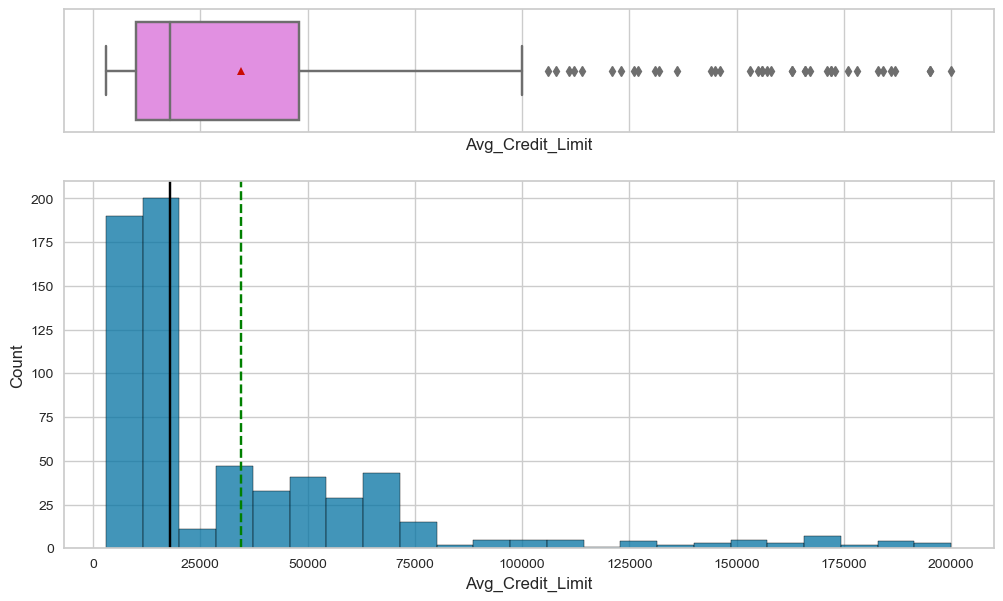

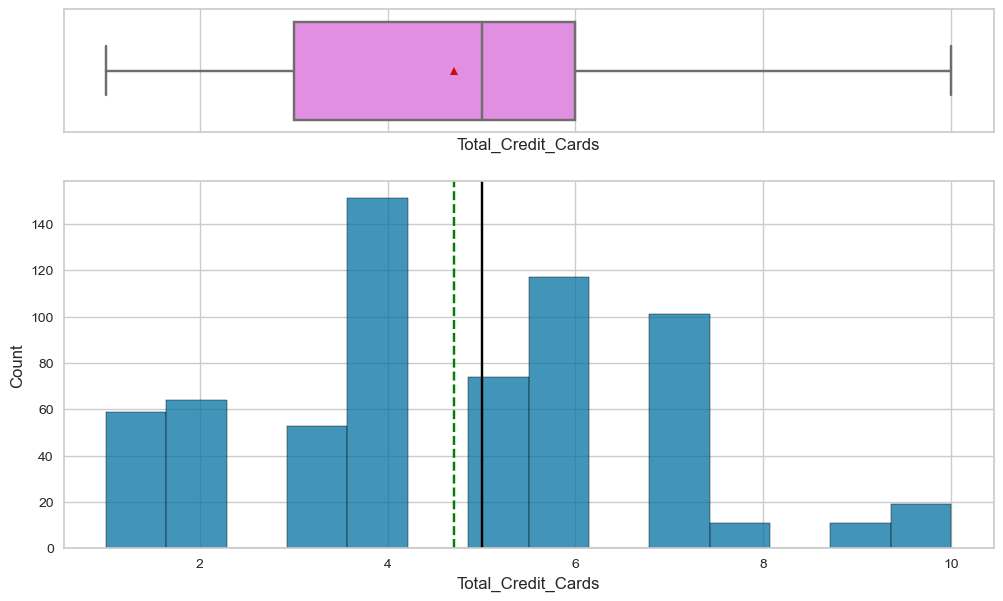

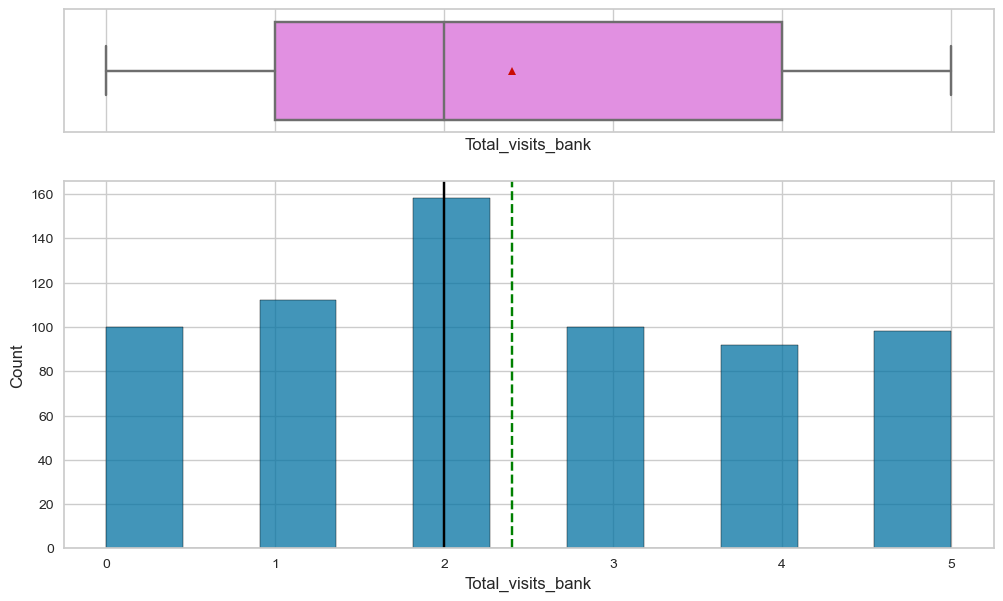

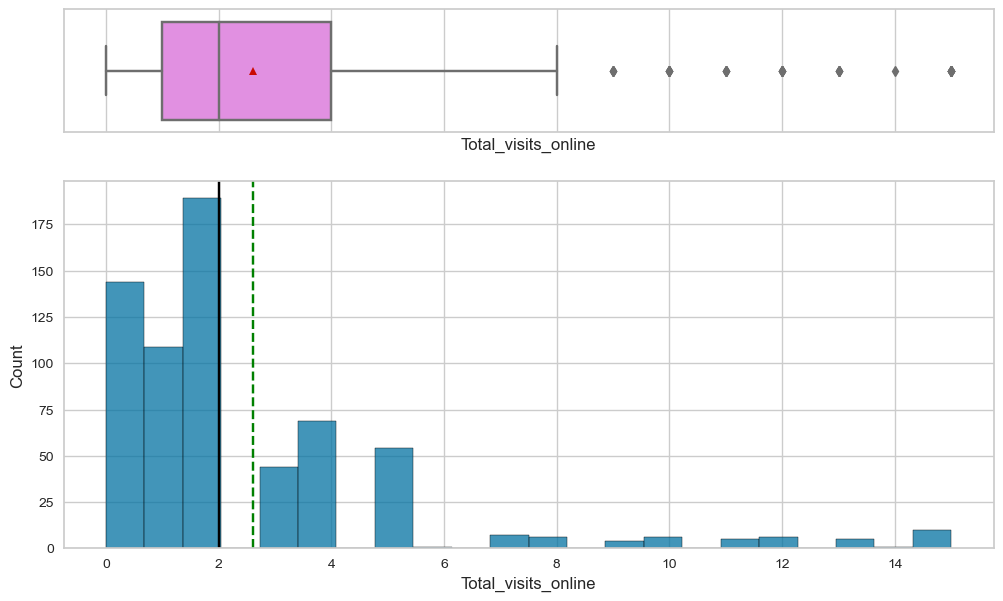

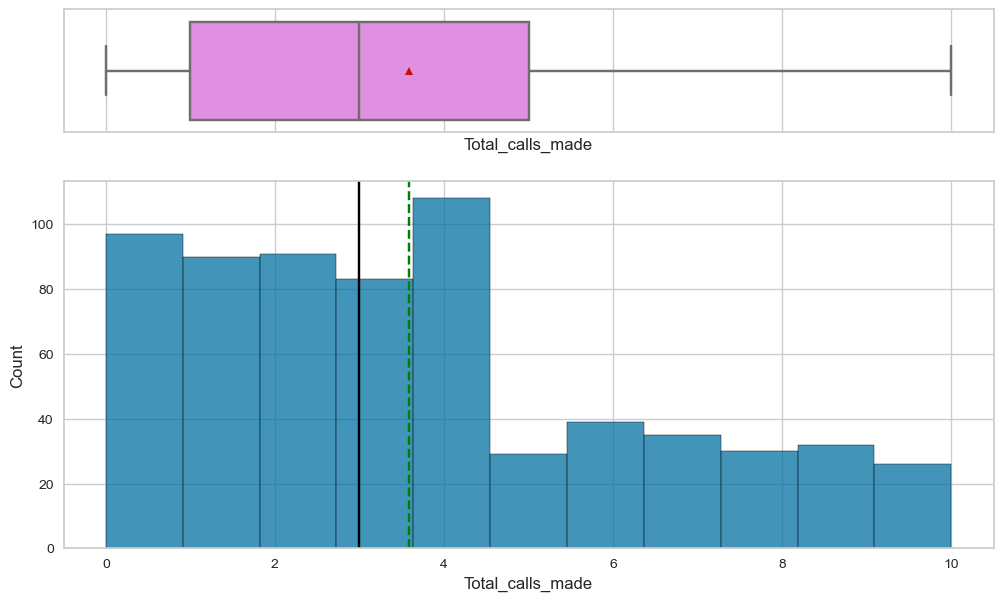

In [14]:
# loop through to get the box plot for all features
for item in num_col:
    histogram_boxplot(data = df, feature = item)

The distribution of this dataset is skewed as a result of outliers...
- The Average credit limit, total visit to bank, total visit online, total calls made are right skewed
- The total number of card is left skewed

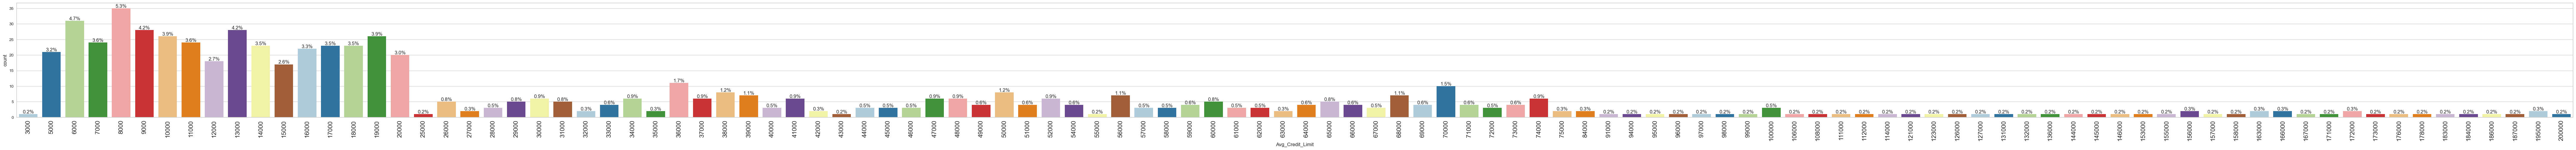

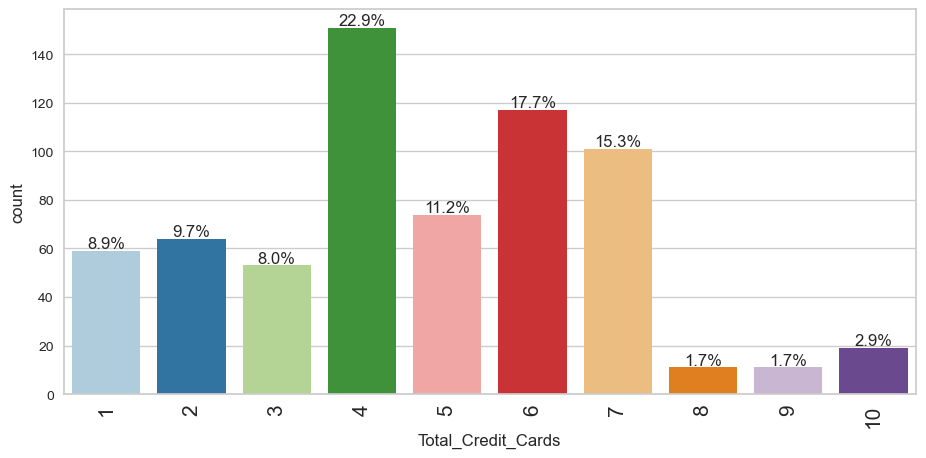

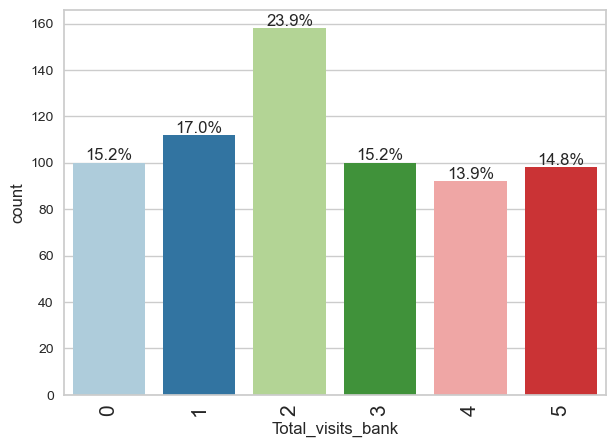

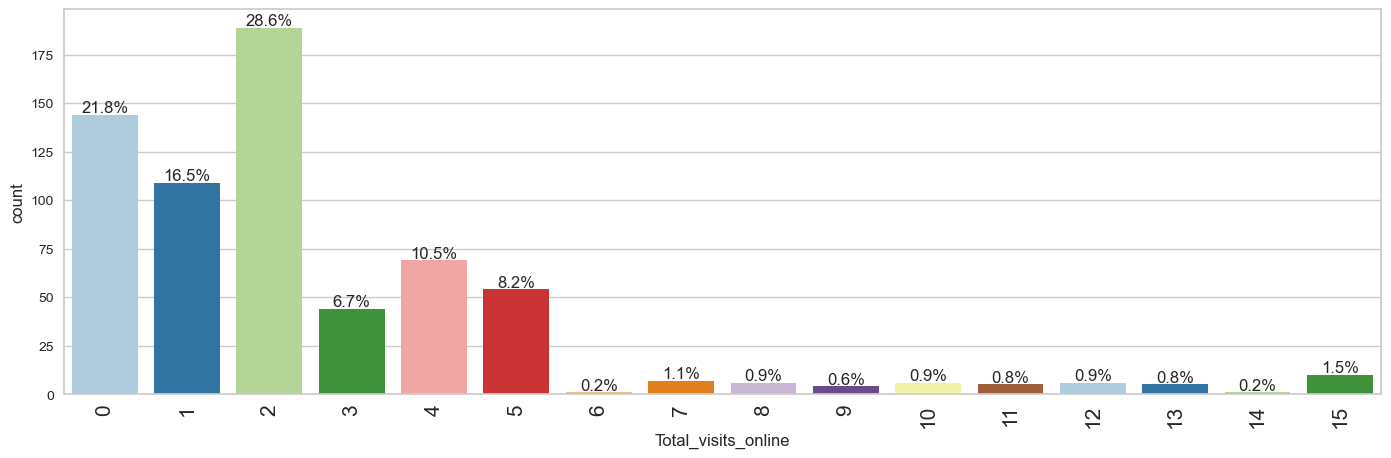

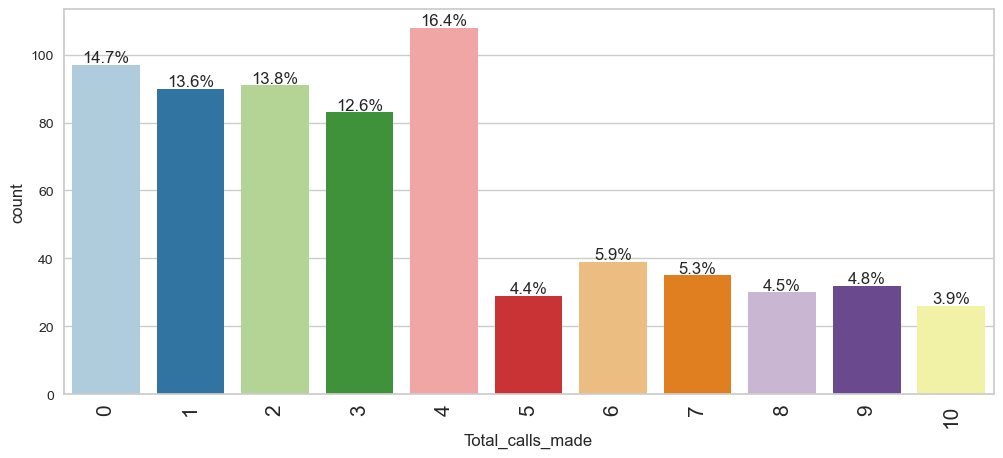

In [15]:
# loop through each features and create a bar plot for each

for col in num_col:
    labeled_barplots(data = df, feature=col, perc=True)

### Bivariate Analysis

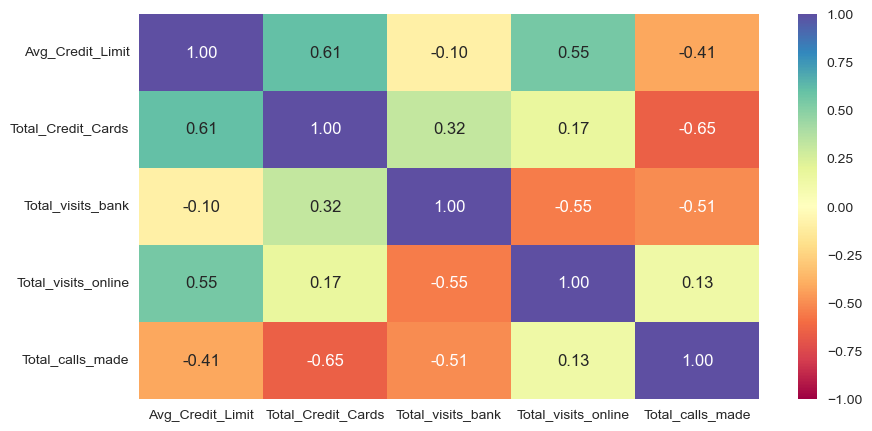

In [16]:
num_data = df[num_col]

cor = num_data.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(cor, vmin = -1, vmax = 1, cmap = "Spectral", annot=True, fmt=".2f")
plt.show()

#### Observation on Heamap

- There's a positive correlation between The average credit card and the number of credit card a customer has, so it is safe to say the more the credit card the higher the average credit card limit
- There is also a negative relationship of -0.65 between the total calls made and the number of credit card. It is logical to say that in the absence of a credit card, more calls will likely be made to the bank for example in a case of approving transaction, similarly for the negative correlation between total calls and total visit to the bank as one is likely to place more calls to avoid going to the bank.

### Data Preprocessing

In [17]:
# scale the dataset before clustering using standard scaler
scaler = StandardScaler()

# create a dataframe of the scaled dataset
scaled_df = pd.DataFrame(scaler.fit_transform(num_data), columns=num_data.columns)

In [18]:
# check data frame
scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


### K-Means Clustering using the default cluster number (8)

In [19]:
# instantiate algorithm
kmeans = KMeans(random_state=0)

# train model with data
kmeans.fit(scaled_df)

C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(random_state=0)

In [20]:
kmeans.inertia_ # thus also helps us determine how good a cluster is and how many clusters is to be used

563.5023751996688

In [21]:
# this prediction represent the number of clusters which the default is 8 clusters
cluster_label = kmeans.predict(scaled_df)
cluster_label

array([3, 6, 3, 5, 2, 6, 7, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6, 0, 0,
       0, 0, 6, 6, 6, 6, 0, 0, 0, 0, 6, 0, 6, 0, 6, 0, 6, 6, 6, 0, 0, 0,
       0, 6, 0, 0, 6, 0, 6, 0, 6, 6, 6, 0, 0, 6, 6, 6, 0, 6, 0, 0, 6, 0,
       0, 0, 6, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 0,
       6, 6, 0, 6, 0, 0, 0, 0, 0, 0, 6, 0, 0, 6, 6, 0, 6, 6, 0, 0, 0, 6,
       0, 6, 6, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 6, 0, 0, 6, 6, 0, 0, 0, 0,
       0, 6, 0, 0, 6, 6, 6, 6, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 0, 0,
       6, 0, 0, 6, 6, 0, 6, 0, 0, 6, 6, 6, 0, 0, 6, 0, 6, 0, 0, 6, 0, 0,
       0, 6, 0, 0, 0, 6, 0, 6, 0, 0, 0, 6, 0, 0, 6, 0, 0, 6, 0, 6, 6, 0,
       0, 6, 6, 6, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 6, 0, 0, 0, 0, 6,
       6, 0, 6, 6, 6, 0, 6, 6, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 5, 5, 5, 4,
       5, 4, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 5, 4, 5, 4, 5, 4, 4, 5, 4, 5,
       4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 4, 5, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4,
       4, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4,

In [22]:
# checking how good the cluster is using the silhouette score metrics
silhouette_score1 = silhouette_score(scaled_df, cluster_label)

The cluster is poor according to the silhouette score metrics. Numbers close to 1 or 1 means the distance between each datapoint of a cluster is close which signifies good cluster

### Obtain Optimal number of cluster betweeun range 1 to 8

C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.0069222262503614


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 2 	Average Distortion: 1.4571553548514269


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 3 	Average Distortion: 1.1466276549150365


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 4 	Average Distortion: 1.0463825294774465


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 5 	Average Distortion: 0.9904384353071455


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 6 	Average Distortion: 0.942639446557584


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 7 	Average Distortion: 0.9103875663118


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 8 	Average Distortion: 0.8933727488227808


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

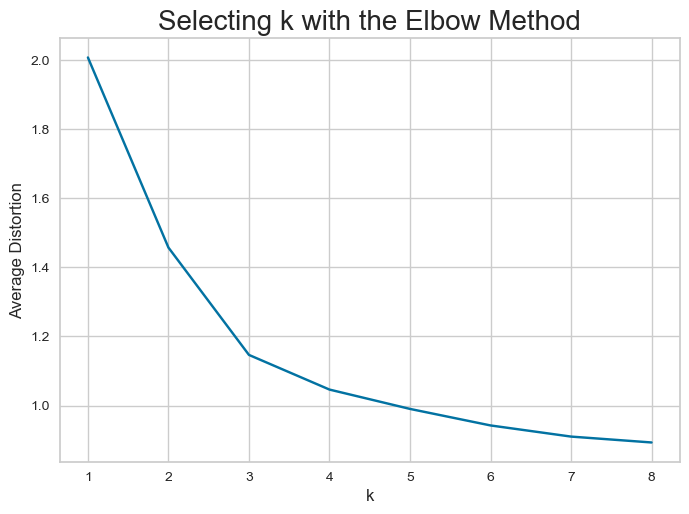

In [23]:
clusters = range(1, 9)
meanDistortions = []  # Create a empty list

'''
using cummulative distance to find the disstortion level (error level)
'''

for k in clusters:
    model = KMeans(n_clusters=k)  # Initialize KMeans
    model.fit(scaled_df)  # Fit kMeans on the data
    prediction = model.predict(scaled_df)  # Predict the model on the data
    
    '''
    calculate the cumulative distance between each features in the dataset and cluster centers using the euclidean
    distance and this is called distortion (data point) to the closest cluster (centercentriod) 
    using the euclidean distance and this is called distortion
    '''
    distortion = (
        sum(np.min(cdist(scaled_df, model.cluster_centers_, "euclidean"), axis=1))
        / scaled_df.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot

The elbow method plot displays that 3 is the optimal number of cluster.

### Using Silhouette score metrics to check the distance of the closeness of each datapoint within clusters

C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 2, silhouette score is 0.41842496663215445


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 3, silhouette score is 0.5157182558881063


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 4, silhouette score is 0.3556670619372605


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 5, silhouette score is 0.2717470361089752


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 6, silhouette score is 0.25545029453623114


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 7, silhouette score is 0.24798644656011146


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 8, silhouette score is 0.24381342060207667


C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For n_clusters = 9, silhouette score is 0.21930021393755966


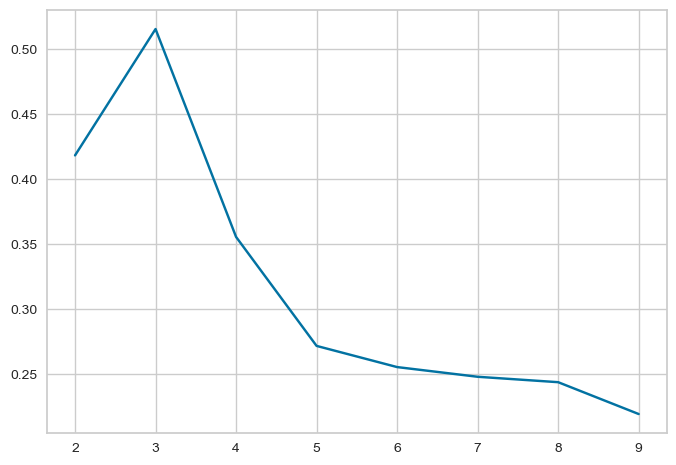

In [24]:
sil_score = []  # Create empty list
cluster_list = list(range(2, 10))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)  # Initializing KMeans algorithm
    preds = clusterer.fit_predict((scaled_df))  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(scaled_df, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

3 number of cluster shows closer distance between datapoints of it's cluster and wider distance between datapoint of other cluster

### Rebuild Kmeans with 3 number of clusters

In [25]:
# rebuild kmeans with 3 clusters
kmeans2 = KMeans(random_state=0, n_clusters = 3)

kmeans2.fit(scaled_df)

C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\USER1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [26]:
# group dataset with number of clusters to get labels
cluster_labels2 = kmeans2.predict(scaled_df)

# evaluate the cluster with silhouette score metrics
silhouette_score2 = silhouette_score(scaled_df, cluster_labels2)
silhouette_score2

0.5157182558881063

In [27]:
# print labels
kmeans2.labels_

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
# add kmeans cluster labels to the scaled dataframe
scaled_df["Kmeans_labels"] = kmeans2.labels_

### Visualize Cluster Groups

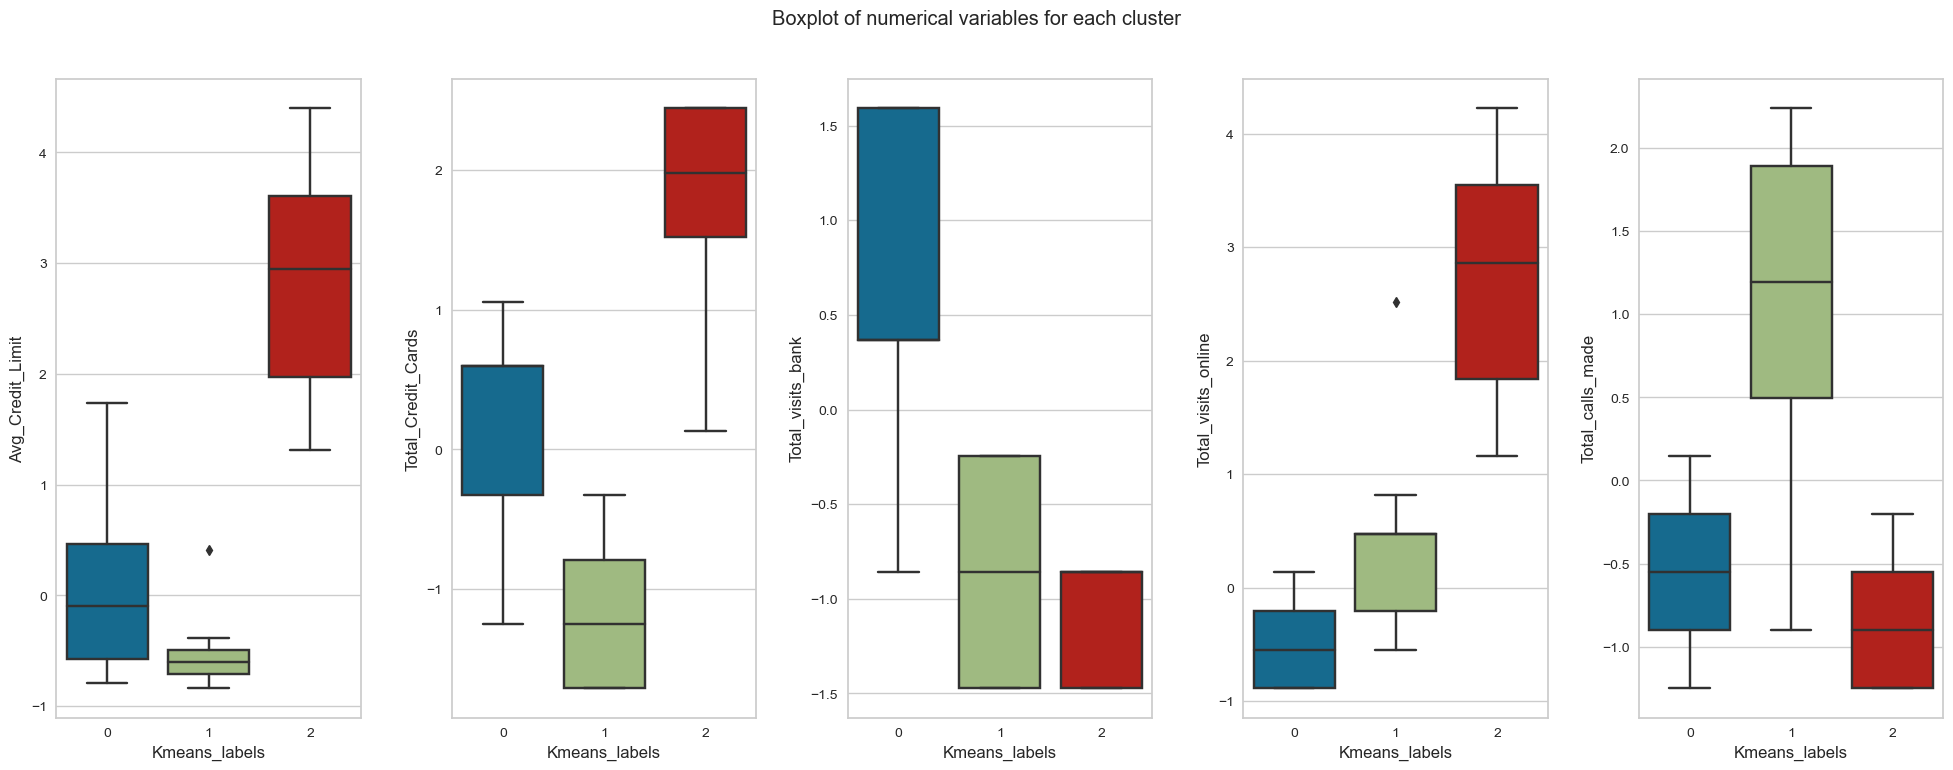

In [29]:
fig, axes = plt.subplots(1, 5, figsize=(20, 8))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=scaled_df[num_col[counter]], x=scaled_df["Kmeans_labels"])
    counter = counter + 1

fig.tight_layout(pad=2.0) # to ensure labels dont overlap

### Label 2 Interpretation - The Spenders
The customers in label 2 have highest credit card limit which could be because they have more credit cards (obviously because they try to spend without much restriction) as seen in the correlation earlier, these customers have more credit cards and this can explain the high credit card limits and they are the ones who are least frequent visiting the bank, rather they use online banking than disturb with calls.

### Label 1 Interpretation - The Savers aka minimal credit cards, minimal credit card limit, minimized spending.
This set of customers have the least number of credit cards and average card limit, they have few times of visiting the bank but not fewer than the customers in label 2, they have mild to low online banking usage/visiting but these customers takes pride in calling the bank the most.

### Label 0 Interpretation-  The 'In between' customers
These customers pay the most visit to the bank, they are the least you would see using the online bank, they also called the bank less they have their total number of credit card is more than label 1 but not as much as label 2, they are in the middle and this is why the credit card average span from low to medium

### To verify the above interpretation, print out the rows of each labels
### Kmeans_labels = 2

In [30]:
scaled_df.query('Kmeans_labels == 2')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_labels
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,2
612,3.256266,1.982253,-0.860451,3.884078,-0.902271,2
613,1.580600,1.982253,-0.860451,2.861408,-1.251537,2
614,3.415854,1.520613,-0.860451,1.497849,-0.902271,2
615,2.564721,1.982253,-0.860451,2.520519,-0.902271,2
616,1.633795,2.443892,-0.860451,2.861408,-0.553005,2
617,2.697711,1.520613,-1.473731,3.543188,-1.251537,2
618,2.298742,1.058973,-1.473731,3.543188,-0.553005,2
619,3.282864,1.058973,-1.473731,3.543188,-1.251537,2


### Kmeans_labels = 1

In [31]:
scaled_df.query('Kmeans_labels == 1')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_labels
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,1
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,1
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,1
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,1
...,...,...,...,...,...,...
224,-0.600427,-0.325946,-0.860451,0.816070,1.891859,1
225,-0.494036,-0.325946,-0.860451,-0.206600,0.494794,1
226,-0.706819,-1.710864,-0.247170,0.475180,1.542593,1
227,-0.706819,-1.249225,-0.247170,0.134290,1.542593,1


### Kmeans_labels = 0

In [32]:
scaled_df.query('Kmeans_labels == 0')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_labels
0,1.740187,-1.249225,-0.860451,-0.54749,-1.251537,0
2,0.410293,1.058973,-0.860451,0.13429,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.54749,0.145528,0
228,-0.653623,1.058973,-0.247170,-0.88838,-1.251537,0
229,-0.706819,1.058973,-0.247170,-0.54749,0.145528,0
...,...,...,...,...,...,...
607,-0.015274,0.597334,0.366110,-0.54749,-1.251537,0
608,0.330499,-0.325946,0.979390,-0.54749,-1.251537,0
609,0.091118,-0.325946,0.366110,-0.20660,-1.251537,0
610,0.117716,1.058973,-0.247170,-0.54749,-1.251537,0


<Axes: xlabel='Kmeans_labels'>

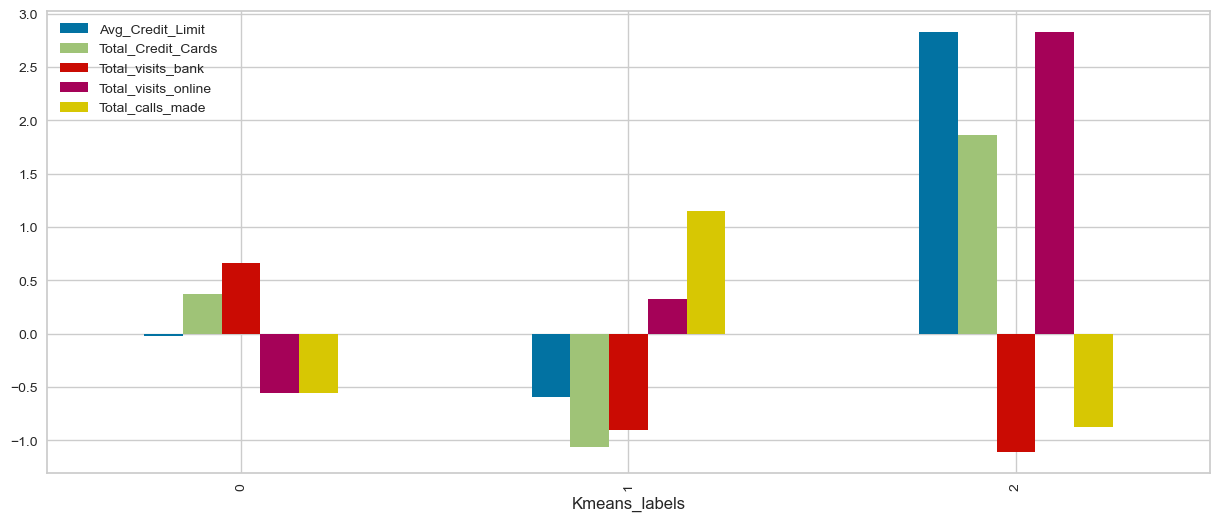

In [33]:
scaled_df.groupby("Kmeans_labels").mean().plot.bar(figsize=(15, 6))

#### Groupby for clearer visualization for the box plot and interpretation. Let's apply the DBSCAN Algorithm as well

### DBSCAN Clustering
### Using the default eps and minPts of 0.5 and 5

In [34]:
# create an instance of the DBSCAN
dbscan = DBSCAN()

'''
Suppose you want the model mybe because tou want to save it,
you'll have to fit it seperately then predict it seperately

# dbscan.fit(num_data_sd)
# db_label = dbscan.predict(num_data_sd)
'''


# fit and predict the labels... fit_predict returns the label not model
dbscan_labels = dbscan.fit_predict(scaled_df)

In [35]:
# check the labels
np.unique(dbscan_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23], dtype=int64)

DBSCAN has given 23 groups/clusters plus the outlier group and this is too much for this smalll dataset.. lets try diff values of eps and minpts

### Choosing optimal values of eps and minPts

In [36]:
# import itertools for iteration purpose
import itertools

# Trying values of eps between 0.1 and 1; minPts between 2 and 10

eps_values = np.linspace(0.1, 1, 10)
minPts_values = np.arange(2, 10) # start from two because one cannot make a group

In [37]:
hyper_list = list(itertools.product(eps_values, minPts_values))

for (eps, minPts) in hyper_list:
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    labels = dbscan.fit_predict(scaled_df)
    num_labels = len(np.unique(labels))
    
    if num_labels >= 2:
        score = silhouette_score(scaled_df, labels)
        print(f"eps: {eps}, minPts: {minPts}, num_labels: {num_labels}, score: {score}")
    else:
        print(f"eps: {eps}, minPts: {minPts}, num_labels: {num_labels} (Skipped silhouette score calculation)")

eps: 0.1, minPts: 2, num_labels: 59, score: -0.38492467822521503
eps: 0.1, minPts: 3, num_labels: 6, score: -0.4669400947733676
eps: 0.1, minPts: 4, num_labels: 3, score: -0.2203976899907933
eps: 0.1, minPts: 5, num_labels: 1 (Skipped silhouette score calculation)
eps: 0.1, minPts: 6, num_labels: 1 (Skipped silhouette score calculation)
eps: 0.1, minPts: 7, num_labels: 1 (Skipped silhouette score calculation)
eps: 0.1, minPts: 8, num_labels: 1 (Skipped silhouette score calculation)
eps: 0.1, minPts: 9, num_labels: 1 (Skipped silhouette score calculation)
eps: 0.2, minPts: 2, num_labels: 89, score: -0.2430046599347939
eps: 0.2, minPts: 3, num_labels: 20, score: -0.48259925658525354
eps: 0.2, minPts: 4, num_labels: 7, score: -0.4163135390494611
eps: 0.2, minPts: 5, num_labels: 1 (Skipped silhouette score calculation)
eps: 0.2, minPts: 6, num_labels: 1 (Skipped silhouette score calculation)
eps: 0.2, minPts: 7, num_labels: 1 (Skipped silhouette score calculation)
eps: 0.2, minPts: 8, num_

Rebuild DBSCAN model using the eps: 1.0, minPts: 3, num_labels: 4, score: 0.5246974989111801...
- 2 minpts was not chosen because that will mean a group for outlier(-1) and the other group for the whole data

### Rebuild DBSCAN with selected hyperparameters

In [38]:
# rebuild the model
dbscan2 = DBSCAN(eps = 1.0, min_samples= 3)
db_label2 = dbscan2.fit_predict(scaled_df)

In [39]:
# check the unique labels
np.unique(db_label2)

array([-1,  0,  1,  2], dtype=int64)

In [40]:
# add the dbscan labels to the original data
scaled_df['DBSCAN_labels'] = db_label2

# check scaled df for
scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmeans_labels,DBSCAN_labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0,-1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1,-1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2,1
...,...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2,1
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2,1
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2,1
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2,1


In [41]:
# sanity check
scaled_df.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'Kmeans_labels',
       'DBSCAN_labels'],
      dtype='object')

### Visualizing clusters of DBSCAN model

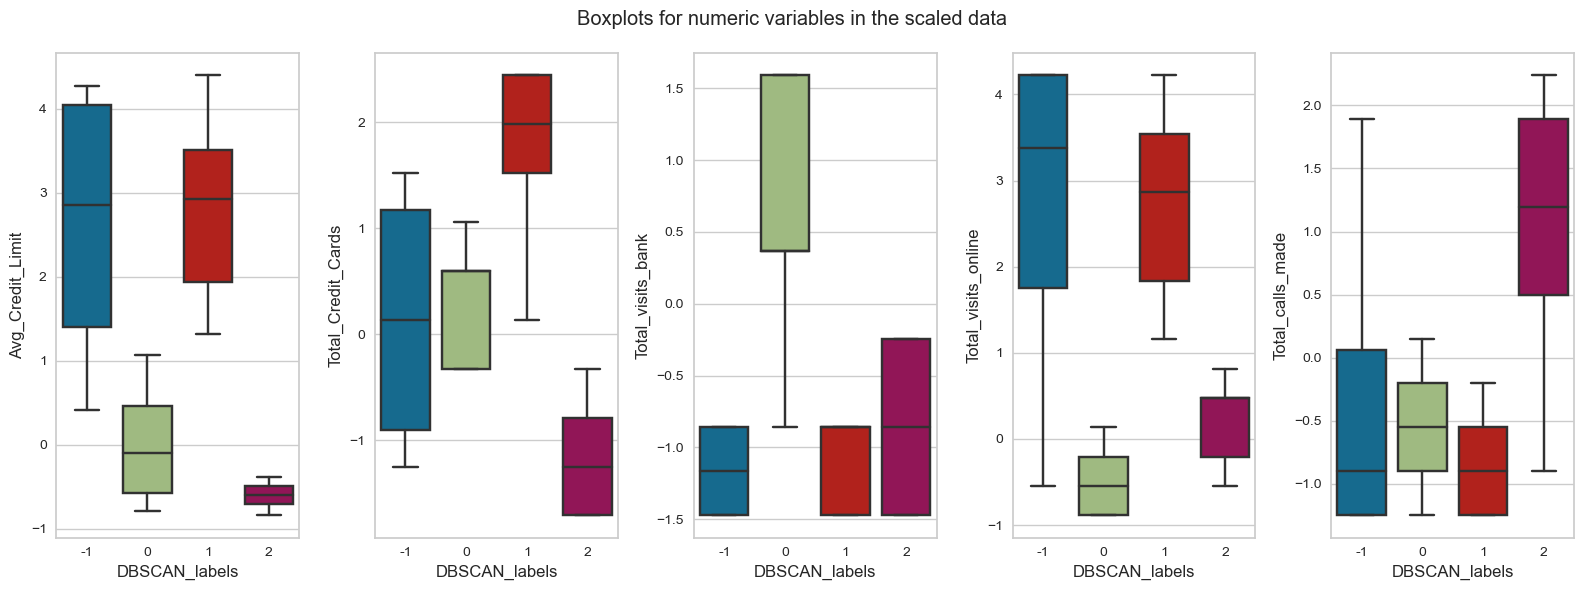

In [42]:
#examine same in the original variables

fig, ax = plt.subplots(1, 5, figsize = (16, 6))
fig.suptitle("Boxplots for numeric variables in the scaled data")

count = 0
for i in range(5):
    sns.boxplot(ax = ax[i], x = scaled_df["DBSCAN_labels"],y = scaled_df[num_col[count]])
    count += 1
fig.tight_layout()

### DBSCAN Labels 
Similar to KMeans clustering we see that;
- label 0 kmeans = label 0 dbscan
- label 1 kmeans = label 2 dbscan
- label 2 kmeans = label 1 dbscan
    The outlier which is labelled -1 are customers with high, medium and to almost low credit limit, they accomodate high to low number of credit cards, although some of these customers rarely visit the bank, majority of them do, they also make calls to bank.
The trend with these customers that are in the -1 label is that they are found doing everything, like the all rounders

### Insights Using the DBSCAN labels
Recommendation based both algorithms as they have similar labels except for the outlier label in DBSCAN
- Customers in label two are untapped market who have the least number of credit card this also includes customers in label 0, so I'll advise that personal marketing should be structured to these customer
- the bank should improve customer service by ensuring that most or if not all issues should be solved without having to go to the bank; in this day and age where customers seek to do things from the comfort of their homes.. 